In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

import pandas as pd
# pd.set_option('display.max_columns', None) # To see the max columns without truncation
# pd.set_option('display.max_rows', None) # To see the max rows without truncation




In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('data/CompleteDataset.csv')

In [5]:
df

Unnamed: 0               Name  Age  \
0               0  Cristiano Ronaldo   32   
1               1           L. Messi   30   
2               2             Neymar   25   
3               3          L. Suárez   30   
4               4           M. Neuer   31   
...           ...                ...  ...   
17976       17976          A. Kelsey   17   
17977       17977      B. Richardson   47   
17978       17978           J. Young   17   
17979       17979       J. Lundstram   18   
17980       17980          L. Sackey   18   

                                                 Photo Nationality  \
0       https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1      https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2      https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3      https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4      https://cdn.sofifa.org/48/18/players/167495.png     Germany   
...                                                ...         ...   
17976  https://cdn.sofifa.org/48/18/players/237463.png     England   
17977   https://cdn.sofifa.org/48/18/players/11728.png     England   
17978  https://cdn.sofifa.org/48/18/players/231381.png    Scotland   
17979  https://cdn.sofifa.org/48/18/players/238813.png     England   
17980  https://cdn.sofifa.org/48/18/players/238308.png       Ghana   

                                       Flag  Overall  Potential  \
0       https://cdn.sofifa.org/flags/38.png       94         94   
1       https://cdn.sofifa.org/flags/52.png       93         93   
2       https://cdn.sofifa.org/flags/54.png       92         94   
3       https://cdn.sofifa.org/flags/60.png       92         92   
4       https://cdn.sofifa.org/flags/21.png       92         92   
...                                     ...      ...        ...   
17976   https://cdn.sofifa.org/flags/14.png       46         63   
17977   https://cdn.sofifa.org/flags/14.png       46         46   
17978   https://cdn.sofifa.org/flags/42.png       46         61   
17979   https://cdn.sofifa.org/flags/14.png       46         64   
17980  https://cdn.sofifa.org/flags/117.png       46         64   

                      Club                                    Club Logo  ...  \
0           Real Madrid CF   https://cdn.sofifa.org/24/18/teams/243.png  ...   
1             FC Barcelona   https://cdn.sofifa.org/24/18/teams/241.png  ...   
2      Paris Saint-Germain    https://cdn.sofifa.org/24/18/teams/73.png  ...   
3             FC Barcelona   https://cdn.sofifa.org/24/18/teams/241.png  ...   
4         FC Bayern Munich    https://cdn.sofifa.org/24/18/teams/21.png  ...   
...                    ...                                          ...  ...   
17976    Scunthorpe United  https://cdn.sofifa.org/24/18/teams/1949.png  ...   
17977    Wycombe Wanderers  https://cdn.sofifa.org/24/18/teams/1933.png  ...   
17978         Swindon Town  https://cdn.sofifa.org/24/18/teams/1934.png  ...   
17979      Crewe Alexandra   https://cdn.sofifa.org/24/18/teams/121.png  ...   
17980    Scunthorpe United  https://cdn.sofifa.org/24/18/teams/1949.png  ...   

         RB   RCB   RCM   RDM    RF    RM    RS    RW   RWB    ST  
0      61.0  53.0  82.0  62.0  91.0  89.0  92.0  91.0  66.0  92.0  
1      57.0  45.0  84.0  59.0  92.0  90.0  88.0  91.0  62.0  88.0  
2      59.0  46.0  79.0  59.0  88.0  87.0  84.0  89.0  64.0  84.0  
3      64.0  58.0  80.0  65.0  88.0  85.0  88.0  87.0  68.0  88.0  
4       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
17976   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
17977   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
17978  31.0  28.0  38.0  29.0  45.0  42.0  45.0  44.0  32.0  45.0  
17979  47.0  46.0  45.0  47.0  43.0  45.0  41.0  44.0  46.0  41.0  
17980  40.0  45.0  30.0  38.0  29.0  30.0  31.0  29.0  38.0  31.0  

[17981 rows x 75 columns]

In [6]:
df.shape

(17981, 75)

In [7]:
df.head(5).T

0  \
Unnamed: 0                                                0   
Name                                      Cristiano Ronaldo   
Age                                                      32   
Photo        https://cdn.sofifa.org/48/18/players/20801.png   
Nationality                                        Portugal   
...                                                     ...   
RM                                                     89.0   
RS                                                     92.0   
RW                                                     91.0   
RWB                                                    66.0   
ST                                                     92.0   

                                                           1  \
Unnamed: 0                                                 1   
Name                                                L. Messi   
Age                                                       30   
Photo        https://cdn.sofifa.org/48/18/players/158023.png   
Nationality                                        Argentina   
...                                                      ...   
RM                                                      90.0   
RS                                                      88.0   
RW                                                      91.0   
RWB                                                     62.0   
ST                                                      88.0   

                                                           2  \
Unnamed: 0                                                 2   
Name                                                  Neymar   
Age                                                       25   
Photo        https://cdn.sofifa.org/48/18/players/190871.png   
Nationality                                           Brazil   
...                                                      ...   
RM                                                      87.0   
RS                                                      84.0   
RW                                                      89.0   
RWB                                                     64.0   
ST                                                      84.0   

                                                           3  \
Unnamed: 0                                                 3   
Name                                               L. Suárez   
Age                                                       30   
Photo        https://cdn.sofifa.org/48/18/players/176580.png   
Nationality                                          Uruguay   
...                                                      ...   
RM                                                      85.0   
RS                                                      88.0   
RW                                                      87.0   
RWB                                                     68.0   
ST                                                      88.0   

                                                           4  
Unnamed: 0                                                 4  
Name                                                M. Neuer  
Age                                                       31  
Photo        https://cdn.sofifa.org/48/18/players/167495.png  
Nationality                                          Germany  
...                                                      ...  
RM                                                       NaN  
RS                                                       NaN  
RW                                                       NaN  
RWB                                                      NaN  
ST                                                       NaN  

[75 rows x 5 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  int64  
 14  Aggression           17981 non-null  int64  
 15  Agility              17981 non-null 

In [9]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1, inplace=True)

In [10]:
df.isnull().sum()


Name              0
Age               0
Nationality       0
Overall           0
Potential         0
               ... 
RM             2029
RS             2029
RW             2029
RWB            2029
ST             2029
Length: 71, dtype: int64

## Data analysis

### Number of countries available and top 5 countries with have highest number of players


In [11]:
print('Total number of countries : {}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(10))
print('-'*80)


Total number of countries : 165
England        1630
Germany        1140
Spain          1019
France          978
Argentina       965
Brazil          812
Italy           799
Colombia        592
Japan           469
Netherlands     429
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------


### Total number of clubs present and top 10 clubs with highest number of players


In [12]:
print('Total number of clubs : {}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(10))

Total number of clubs : 647
Villarreal CF         35
OGC Nice              34
Borussia Dortmund     34
VfL Wolfsburg         34
FC Nantes             34
UD Las Palmas         34
Olympique Lyonnais    34
Manchester United     34
Manchester City       33
Arsenal               33
Name: Club, dtype: int64


### Player with highest potential and overall performance


In [13]:
print('Highest potential score player :'+ str(df.loc[df['Potential'].idxmax()][0]))
print('Maximum Overall Performance : '+str(df.loc[df['Overall'].idxmax()][0]))


Highest potential score player :Cristiano Ronaldo
Maximum Overall Performance : Cristiano Ronaldo


### Change the data of the attributes from object to int for applying idx max function

In [14]:
df['Acceleration'] = pd.to_numeric(df['Acceleration'])
df['Aggression'] = pd.to_numeric(df['Aggression'])
df['Agility'] = pd.to_numeric(df['Agility'])
df['Balance'] = pd.to_numeric(df['Balance'])
df['Ball control'] = pd.to_numeric(df['Ball control'])
df['Composure'] = pd.to_numeric(df['Composure'])
df['Crossing'] = pd.to_numeric(df['Crossing'])
df['Curve'] = pd.to_numeric(df['Curve'])
df['Dribbling'] = pd.to_numeric(df['Dribbling'])
df['Finishing'] = pd.to_numeric(df['Finishing'])
df['Free kick accuracy'] = pd.to_numeric(df['Free kick accuracy'])
df['GK diving'] = pd.to_numeric(df['GK diving'])
df['GK handling'] = pd.to_numeric(df['GK handling'])
df['GK kicking'] = pd.to_numeric(df['GK kicking'])
df['GK positioning'] = pd.to_numeric(df['GK positioning'])
df['GK reflexes'] = pd.to_numeric(df['GK reflexes'])
df['Heading accuracy'] = pd.to_numeric(df['Heading accuracy'])
df['Interceptions'] = pd.to_numeric(df['Interceptions'])
df['Jumping'] = pd.to_numeric(df['Jumping'])
df['Long passing'] = pd.to_numeric(df['Long passing'])
df['Long shots'] = pd.to_numeric(df['Long shots'])
df['Marking'] = pd.to_numeric(df['Marking'])
df['Penalties'] = pd.to_numeric(df['Penalties'])
df['Positioning'] = pd.to_numeric(df['Positioning'])
df['Reactions'] = pd.to_numeric(df['Reactions'])
df['Short passing'] = pd.to_numeric(df['Short passing'])
df['Shot power'] = pd.to_numeric(df['Shot power'])
df['Sliding tackle'] = pd.to_numeric(df['Sliding tackle'])
df['Sprint speed'] = pd.to_numeric(df['Sprint speed'])
df['Stamina'] = pd.to_numeric(df['Stamina'])
df['Standing tackle'] = pd.to_numeric(df['Standing tackle'])
df['Strength'] = pd.to_numeric(df['Strength'])
df['Vision'] = pd.to_numeric(df['Vision'])
df['Volleys'] = pd.to_numeric(df['Volleys'])



In [15]:
df.dtypes['Acceleration']

dtype('int64')

### Best in different aspects:

In [16]:
pr_cols=['Acceleration','Aggression','Agility','Balance','Ball control','Composure','Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots',
       'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing',
       'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys',]
print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][0]))
    i += 1

BEST IN DIFFERENT ASPECTS :
_________________________


Best Acceleration : Douglas Costa
Best Aggression : B. Brereton
Best Agility : Neymar
Best Balance : Bernard
Best Ball control : L. Messi
Best Composure : E. Mammana
Best Crossing : S. Tigges
Best Curve : Quaresma
Best Dribbling : L. Messi
Best Finishing : L. Messi
Best Free kick accuracy : A. Gomes
Best GK diving : M. Neuer
Best GK handling : T. Courtois
Best GK kicking : M. Neuer
Best GK positioning : M. Neuer
Best GK reflexes : De Gea
Best Heading accuracy : Aduriz
Best Interceptions : A. Barzagli
Best Jumping : Cristiano Ronaldo
Best Long passing : T. Kroos
Best Long shots : Cristiano Ronaldo
Best Marking : G. Chiellini
Best Penalties : M. Balotelli
Best Positioning : Cristiano Ronaldo
Best Reactions : Cristiano Ronaldo
Best Short passing : L. Modrić
Best Shot power : L. Dunk
Best Sliding tackle : M. Diouf
Best Sprint speed : M. Palienko
Best Stamina : D. Yearwood
Best Standing tackle : M. Diouf
Best Strength : A. Akinfenwa
Be

In [17]:
# Interpret the value attribute
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]
        
        if suffix == 'M':
            value *= 1000000
        elif suffix == 'K':
            value *= 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)
        

In [18]:
df.head().T

0          1       2          3         4
Name         Cristiano Ronaldo   L. Messi  Neymar  L. Suárez  M. Neuer
Age                         32         30      25         30        31
Nationality           Portugal  Argentina  Brazil    Uruguay   Germany
Overall                     94         93      92         92        92
Potential                   94         93      94         92        92
...                        ...        ...     ...        ...       ...
RM                        89.0       90.0    87.0       85.0       NaN
RS                        92.0       88.0    84.0       88.0       NaN
RW                        91.0       91.0    89.0       87.0       NaN
RWB                       66.0       62.0    64.0       68.0       NaN
ST                        92.0       88.0    84.0       88.0       NaN

[71 rows x 5 columns]

### Top earners

In [19]:
df.dtypes['Value']

dtype('float64')

In [20]:
df['Value'] = df['Value'].astype(np.int64)


In [21]:
df.dtypes['Value']

dtype('int64')

In [22]:
df.to_csv('data/saved_data.csv',sep=',')

### Top 10 most valuable players

In [23]:
top_valued = df.nlargest(10, 'Value')
print(top_valued)

                 Name  Age Nationality  Overall  Potential  \
2              Neymar   25      Brazil       92         94   
1            L. Messi   30   Argentina       93         93   
3           L. Suárez   30     Uruguay       92         92   
0   Cristiano Ronaldo   32    Portugal       94         94   
5      R. Lewandowski   28      Poland       91         91   
7           E. Hazard   26     Belgium       90         91   
11       K. De Bruyne   26     Belgium       89         92   
8            T. Kroos   27     Germany       90         90   
19          P. Dybala   23   Argentina       88         93   
9          G. Higuaín   29   Argentina       90         90   

                   Club      Value      Wage  Special  Acceleration  ...  \
2   Paris Saint-Germain  123000000  280000.0     2100            94  ...   
1          FC Barcelona  105000000  565000.0     2154            92  ...   
3          FC Barcelona   97000000  510000.0     2291            88  ...   
0        Real

### Summary
1. Neymar: €123M 
2. L. Messi: €105M 
3. L. Suárez: €97M 
4. Cristiano Ronaldo: €95.5M 
5. R. Lewandowski: €92M 
6. E. Hazard: €90.5M 
7. K. De Bruyne €83M 
8. T. Kroos: €79M 
9. P. Dybala €79M 
10. G. Higuaín €79M 

### Top 10 most earning players

In [24]:
top_earners = df.nlargest(10, 'Wage')
print(top_earners)

                 Name  Age Nationality  Overall  Potential              Club  \
0   Cristiano Ronaldo   32    Portugal       94         94    Real Madrid CF   
1            L. Messi   30   Argentina       93         93      FC Barcelona   
3           L. Suárez   30     Uruguay       92         92      FC Barcelona   
15            G. Bale   27       Wales       89         89    Real Madrid CF   
5      R. Lewandowski   28      Poland       91         91  FC Bayern Munich   
8            T. Kroos   27     Germany       90         90    Real Madrid CF   
14          L. Modrić   31     Croatia       89         89    Real Madrid CF   
16          S. Agüero   29   Argentina       89         89   Manchester City   
10       Sergio Ramos   31       Spain       90         90    Real Madrid CF   
7           E. Hazard   26     Belgium       90         91           Chelsea   

        Value      Wage  Special  Acceleration  ...    RB   RCB   RCM   RDM  \
0    95500000  565000.0     2228        

### Summary
1. Cristiano Ronaldo: €565K
2. L. Messi: €565K
3. L. Suárez: €510K
4. G. Bale: €370K
5. R. Lewandowski: €355K
6. T. Kroos: €340K
7. L. Modrić: €340K
8. S. Agüero: €325K
9. Sergio Ramos: €310K
10. E. Hazard: €295K


## Exploratory Data Analysis

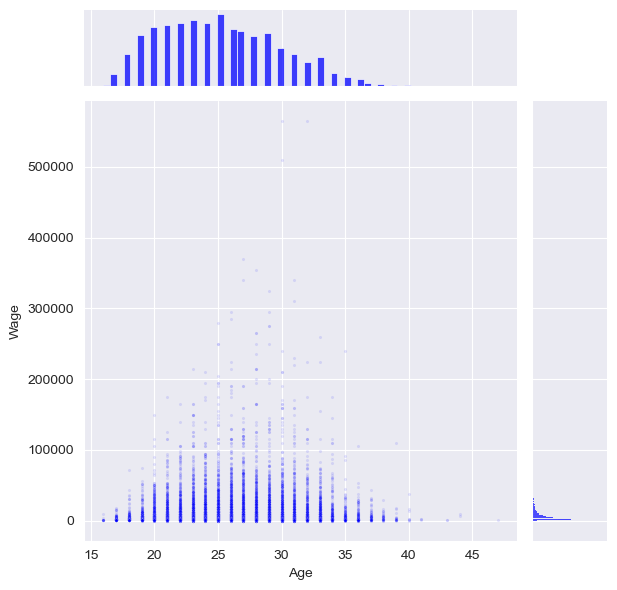

In [25]:
sns.jointplot(x=df['Age'], y=df['Wage'],
              joint_kws={'alpha':0.1,'s':5,'color':'blue'},
              marginal_kws={'color':'blue'},
              )

### Age vs X attribute correlation

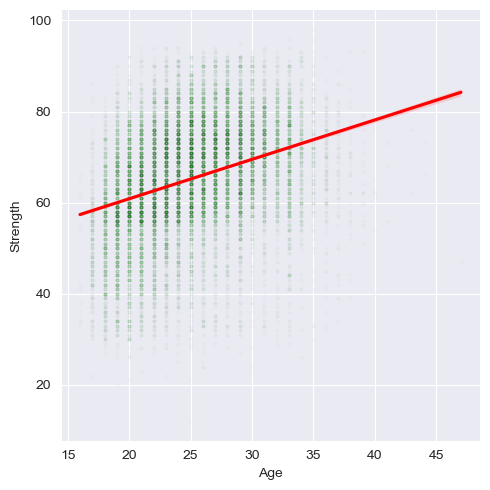

In [26]:
sns.lmplot(data = df, x = 'Age', y = 'Strength',scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

### Dribbing vs Ball Control correlation

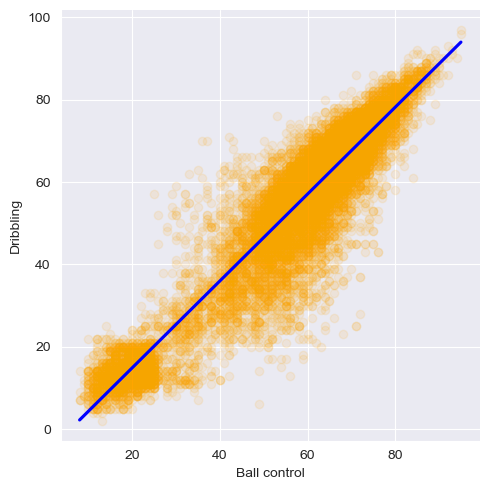

In [27]:
sns.lmplot(x='Ball control', y='Dribbling',data=df,scatter_kws={'alpha':0.1,'color':'orange'},
           line_kws={'color':'blue'})

### Crossing vs Dribbling

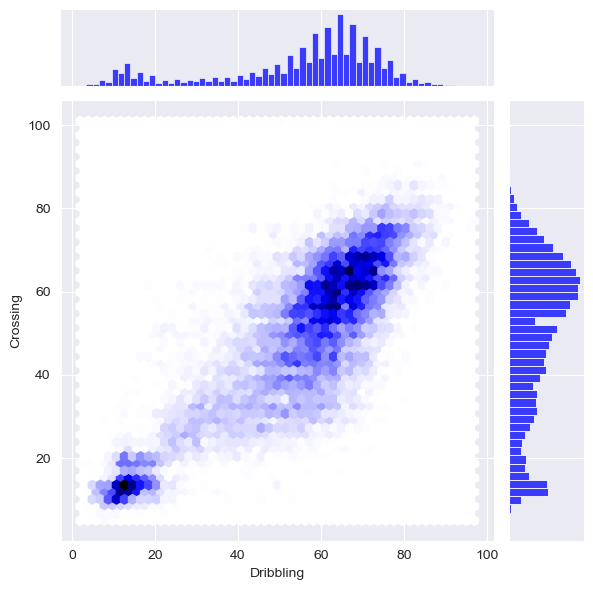

In [28]:
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind='hex', color='blue')

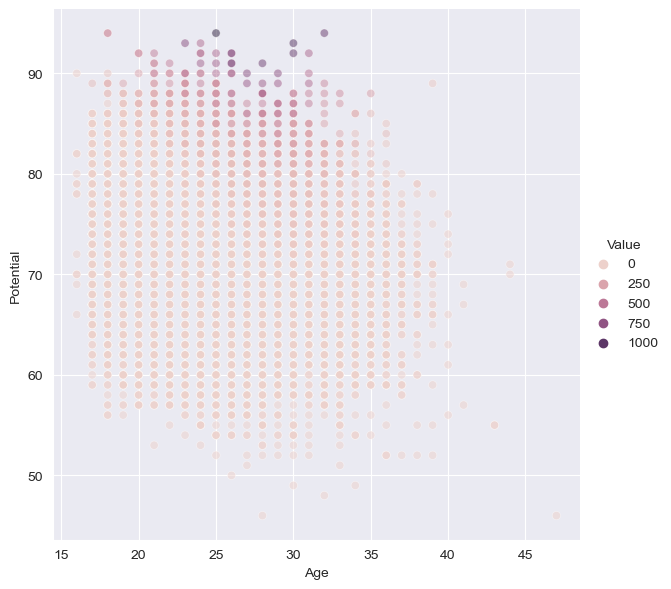

In [29]:
value = df.Value
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.relplot(x='Age', y='Potential', hue=value/100000,
           sizes=(40,400), alpha=.5,
           height=6, data=df)


### Compute pairwise correlations

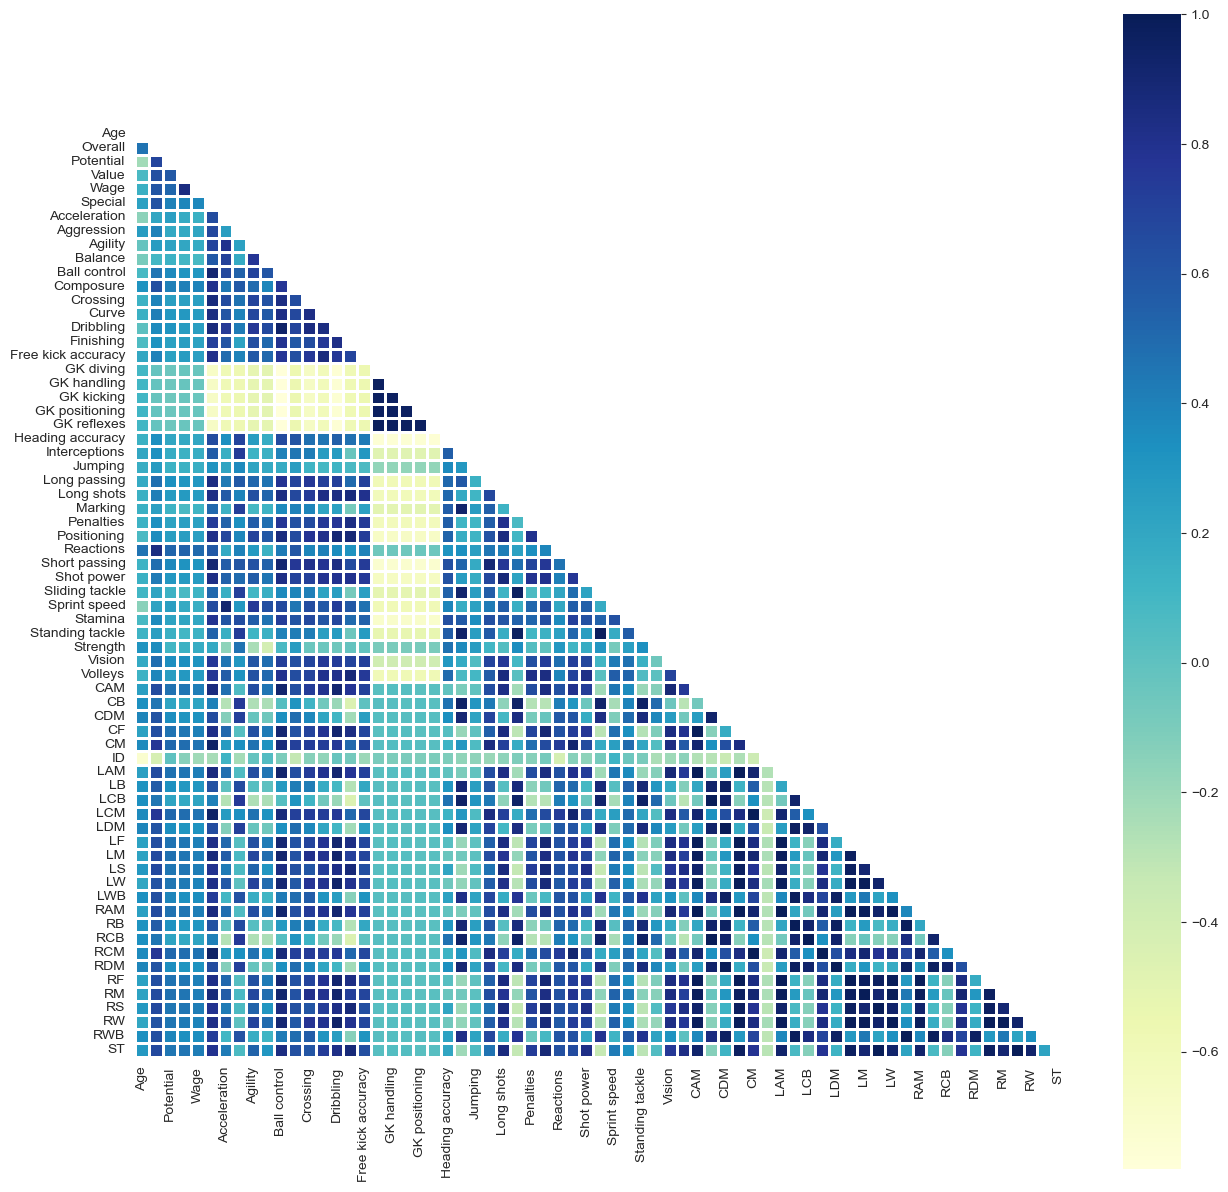

In [30]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap='YlGnBu')

In [31]:
cols =['Age','Overall','Potential','Acceleration','Agility','Sprint speed','Stamina','Strength']
df_small = df[cols]

In [32]:
df_small.head()

Age  Overall  Potential  Acceleration  Agility  Sprint speed  Stamina  \
0   32       94         94            89       89            91       92   
1   30       93         93            92       90            87       73   
2   25       92         94            94       96            90       78   
3   30       92         92            88       86            77       89   
4   31       92         92            58       52            61       44   

   Strength  
0        80  
1        59  
2        53  
3        80  
4        83

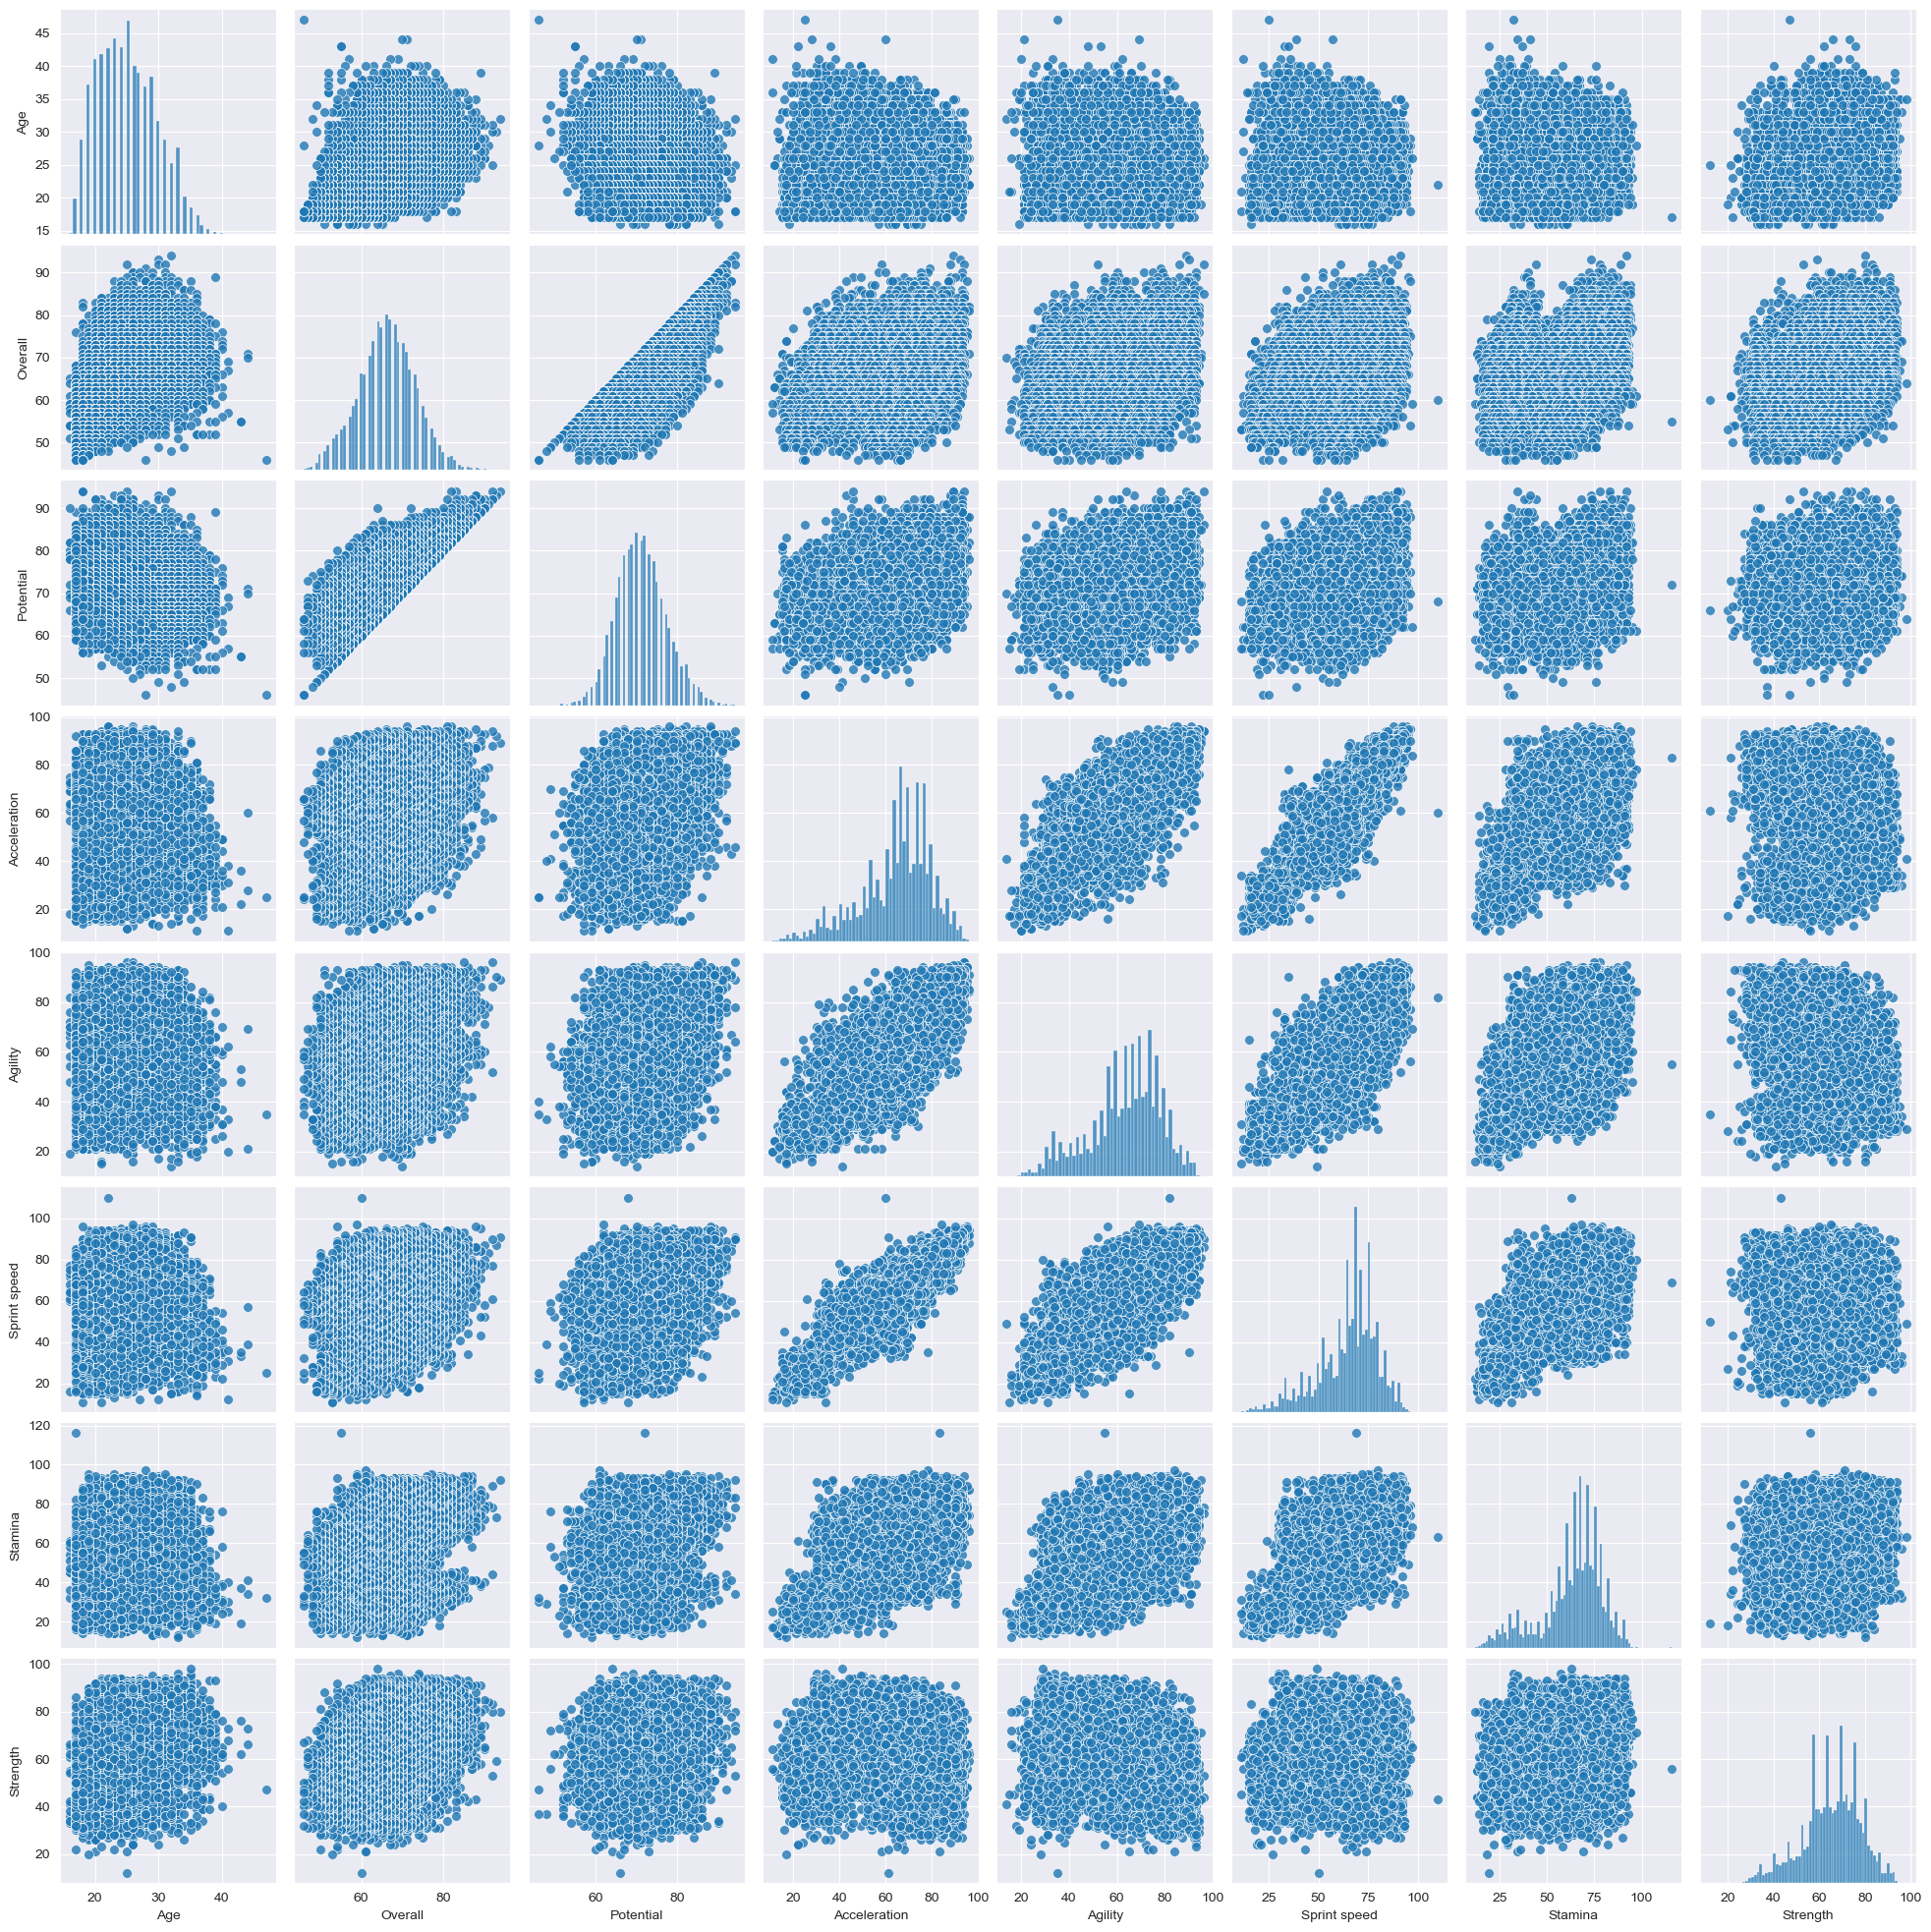

In [33]:
sns.pairplot(df_small, palette=['black','red'], plot_kws=dict(s=50, alpha=0.8), markers=['^','v'])

### From the results we can infer many things
+ Acceleration and SprintSpeed follow a proper linear relationship
+ Agility vs SprintSpeed, Agility vs Acceleration  have somewhat linear relationship


## Modeling

In [114]:
df = pd.read_csv('data/CompleteDataset.csv')

In [115]:
df

Unnamed: 0               Name  Age  \
0               0  Cristiano Ronaldo   32   
1               1           L. Messi   30   
2               2             Neymar   25   
3               3          L. Suárez   30   
4               4           M. Neuer   31   
...           ...                ...  ...   
17976       17976          A. Kelsey   17   
17977       17977      B. Richardson   47   
17978       17978           J. Young   17   
17979       17979       J. Lundstram   18   
17980       17980          L. Sackey   18   

                                                 Photo Nationality  \
0       https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1      https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2      https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3      https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4      https://cdn.sofifa.org/48/18/players/167495.png     Germany   
...                                                ...         ...   
17976  https://cdn.sofifa.org/48/18/players/237463.png     England   
17977   https://cdn.sofifa.org/48/18/players/11728.png     England   
17978  https://cdn.sofifa.org/48/18/players/231381.png    Scotland   
17979  https://cdn.sofifa.org/48/18/players/238813.png     England   
17980  https://cdn.sofifa.org/48/18/players/238308.png       Ghana   

                                       Flag  Overall  Potential  \
0       https://cdn.sofifa.org/flags/38.png       94         94   
1       https://cdn.sofifa.org/flags/52.png       93         93   
2       https://cdn.sofifa.org/flags/54.png       92         94   
3       https://cdn.sofifa.org/flags/60.png       92         92   
4       https://cdn.sofifa.org/flags/21.png       92         92   
...                                     ...      ...        ...   
17976   https://cdn.sofifa.org/flags/14.png       46         63   
17977   https://cdn.sofifa.org/flags/14.png       46         46   
17978   https://cdn.sofifa.org/flags/42.png       46         61   
17979   https://cdn.sofifa.org/flags/14.png       46         64   
17980  https://cdn.sofifa.org/flags/117.png       46         64   

                      Club                                    Club Logo  ...  \
0           Real Madrid CF   https://cdn.sofifa.org/24/18/teams/243.png  ...   
1             FC Barcelona   https://cdn.sofifa.org/24/18/teams/241.png  ...   
2      Paris Saint-Germain    https://cdn.sofifa.org/24/18/teams/73.png  ...   
3             FC Barcelona   https://cdn.sofifa.org/24/18/teams/241.png  ...   
4         FC Bayern Munich    https://cdn.sofifa.org/24/18/teams/21.png  ...   
...                    ...                                          ...  ...   
17976    Scunthorpe United  https://cdn.sofifa.org/24/18/teams/1949.png  ...   
17977    Wycombe Wanderers  https://cdn.sofifa.org/24/18/teams/1933.png  ...   
17978         Swindon Town  https://cdn.sofifa.org/24/18/teams/1934.png  ...   
17979      Crewe Alexandra   https://cdn.sofifa.org/24/18/teams/121.png  ...   
17980    Scunthorpe United  https://cdn.sofifa.org/24/18/teams/1949.png  ...   

         RB   RCB   RCM   RDM    RF    RM    RS    RW   RWB    ST  
0      61.0  53.0  82.0  62.0  91.0  89.0  92.0  91.0  66.0  92.0  
1      57.0  45.0  84.0  59.0  92.0  90.0  88.0  91.0  62.0  88.0  
2      59.0  46.0  79.0  59.0  88.0  87.0  84.0  89.0  64.0  84.0  
3      64.0  58.0  80.0  65.0  88.0  85.0  88.0  87.0  68.0  88.0  
4       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
17976   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
17977   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
17978  31.0  28.0  38.0  29.0  45.0  42.0  45.0  44.0  32.0  45.0  
17979  47.0  46.0  45.0  47.0  43.0  45.0  41.0  44.0  46.0  41.0  
17980  40.0  45.0  30.0  38.0  29.0  30.0  31.0  29.0  38.0  31.0  

[17981 rows x 75 columns]

### Drop unnecessary attributes (columns)

In [116]:
drop_cols = df.columns[47:75]
df = df.drop(drop_cols, axis=1)

In [117]:
df

Unnamed: 0               Name  Age  \
0               0  Cristiano Ronaldo   32   
1               1           L. Messi   30   
2               2             Neymar   25   
3               3          L. Suárez   30   
4               4           M. Neuer   31   
...           ...                ...  ...   
17976       17976          A. Kelsey   17   
17977       17977      B. Richardson   47   
17978       17978           J. Young   17   
17979       17979       J. Lundstram   18   
17980       17980          L. Sackey   18   

                                                 Photo Nationality  \
0       https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1      https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2      https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3      https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4      https://cdn.sofifa.org/48/18/players/167495.png     Germany   
...                                                ...         ...   
17976  https://cdn.sofifa.org/48/18/players/237463.png     England   
17977   https://cdn.sofifa.org/48/18/players/11728.png     England   
17978  https://cdn.sofifa.org/48/18/players/231381.png    Scotland   
17979  https://cdn.sofifa.org/48/18/players/238813.png     England   
17980  https://cdn.sofifa.org/48/18/players/238308.png       Ghana   

                                       Flag  Overall  Potential  \
0       https://cdn.sofifa.org/flags/38.png       94         94   
1       https://cdn.sofifa.org/flags/52.png       93         93   
2       https://cdn.sofifa.org/flags/54.png       92         94   
3       https://cdn.sofifa.org/flags/60.png       92         92   
4       https://cdn.sofifa.org/flags/21.png       92         92   
...                                     ...      ...        ...   
17976   https://cdn.sofifa.org/flags/14.png       46         63   
17977   https://cdn.sofifa.org/flags/14.png       46         46   
17978   https://cdn.sofifa.org/flags/42.png       46         61   
17979   https://cdn.sofifa.org/flags/14.png       46         64   
17980  https://cdn.sofifa.org/flags/117.png       46         64   

                      Club                                    Club Logo  ...  \
0           Real Madrid CF   https://cdn.sofifa.org/24/18/teams/243.png  ...   
1             FC Barcelona   https://cdn.sofifa.org/24/18/teams/241.png  ...   
2      Paris Saint-Germain    https://cdn.sofifa.org/24/18/teams/73.png  ...   
3             FC Barcelona   https://cdn.sofifa.org/24/18/teams/241.png  ...   
4         FC Bayern Munich    https://cdn.sofifa.org/24/18/teams/21.png  ...   
...                    ...                                          ...  ...   
17976    Scunthorpe United  https://cdn.sofifa.org/24/18/teams/1949.png  ...   
17977    Wycombe Wanderers  https://cdn.sofifa.org/24/18/teams/1933.png  ...   
17978         Swindon Town  https://cdn.sofifa.org/24/18/teams/1934.png  ...   
17979      Crewe Alexandra   https://cdn.sofifa.org/24/18/teams/121.png  ...   
17980    Scunthorpe United  https://cdn.sofifa.org/24/18/teams/1949.png  ...   

      Reactions Short passing  Shot power  Sliding tackle  Sprint speed  \
0            96            83          94              23            91   
1            95            88          85              26            87   
2            88            81          80              33            90   
3            93            83          87              38            77   
4            85            55          25              11            61   
...         ...           ...         ...             ...           ...   
17976        40            19          19              10            32   
17977        51            12          13              13            25   
17978        54            42          42              14            51   
17979        49            49          43              47            58   
17980        40            31     

In [118]:
df = df.drop(['Unnamed: 0','Photo','Flag','Club Logo','Special','Value','Wage','Name','Club'], axis=1)
df.head()

Age Nationality  Overall  Potential  Acceleration  Aggression  Agility  \
0   32    Portugal       94         94            89          63       89   
1   30   Argentina       93         93            92          48       90   
2   25      Brazil       92         94            94          56       96   
3   30     Uruguay       92         92            88          78       86   
4   31     Germany       92         92            58          29       52   

   Balance  Ball control  Composure  ...  Reactions  Short passing  \
0       63            93         95  ...         96             83   
1       95            95         96  ...         95             88   
2       82            95         92  ...         88             81   
3       60            91         83  ...         93             83   
4       35            48         70  ...         85             55   

   Shot power  Sliding tackle  Sprint speed  Stamina  Standing tackle  \
0          94              23            91       92               31   
1          85              26            87       73               28   
2          80              33            90       78               24   
3          87              38            77       89               45   
4          25              11            61       44               10   

   Strength  Vision  Volleys  
0        80      85       88  
1        59      90       85  
2        53      80       83  
3        80      84       88  
4        83      70       11  

[5 rows x 38 columns]

### Drop NA values

In [119]:
df = df.dropna()
df.head()

Age Nationality  Overall  Potential  Acceleration  Aggression  Agility  \
0   32    Portugal       94         94            89          63       89   
1   30   Argentina       93         93            92          48       90   
2   25      Brazil       92         94            94          56       96   
3   30     Uruguay       92         92            88          78       86   
4   31     Germany       92         92            58          29       52   

   Balance  Ball control  Composure  ...  Reactions  Short passing  \
0       63            93         95  ...         96             83   
1       95            95         96  ...         95             88   
2       82            95         92  ...         88             81   
3       60            91         83  ...         93             83   
4       35            48         70  ...         85             55   

   Shot power  Sliding tackle  Sprint speed  Stamina  Standing tackle  \
0          94              23            91       92               31   
1          85              26            87       73               28   
2          80              33            90       78               24   
3          87              38            77       89               45   
4          25              11            61       44               10   

   Strength  Vision  Volleys  
0        80      85       88  
1        59      90       85  
2        53      80       83  
3        80      84       88  
4        83      70       11  

[5 rows x 38 columns]

### Create a simplified position variable to account for all player positions

### Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)

In [120]:
nat_counts = df.Nationality.value_counts()
print(nat_counts)
nat_list = nat_counts[nat_counts > 250].index.tolist()
print(nat_list)

England      1630
Germany      1140
Spain        1019
France        978
Argentina     965
             ... 
Fiji            1
Eritrea         1
Guatemala       1
Oman            1
Hong Kong       1
Name: Nationality, Length: 165, dtype: int64
['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Italy', 'Colombia', 'Japan', 'Netherlands', 'Republic of Ireland', 'United States', 'Chile', 'Sweden', 'Portugal', 'Mexico', 'Denmark', 'Poland', 'Norway', 'Korea Republic', 'Saudi Arabia', 'Russia', 'Scotland', 'Turkey', 'Belgium', 'Austria']


### Replace Nationality with a binary indicator variable for 'Major Nation'


In [121]:
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

### Create a copy of the original dataframe

In [122]:
df1 = df.copy()

In [123]:
df1

Age Nationality  Overall  Potential  Acceleration  Aggression  Agility  \
0       32    Portugal       94         94            89          63       89   
1       30   Argentina       93         93            92          48       90   
2       25      Brazil       92         94            94          56       96   
3       30     Uruguay       92         92            88          78       86   
4       31     Germany       92         92            58          29       52   
...    ...         ...      ...        ...           ...         ...      ...   
17976   17     England       46         63            24          16       38   
17977   47     England       46         46            25          44       35   
17978   17    Scotland       46         61            66          26       60   
17979   18     England       46         64            57          46       58   
17980   18       Ghana       46         64            48          52       49   

       Balance  Ball control  Composure  ...  Reactions  Short passing  \
0           63            93         95  ...         96             83   
1           95            95         96  ...         95             88   
2           82            95         92  ...         88             81   
3           60            91         83  ...         93             83   
4           35            48         70  ...         85             55   
...        ...           ...        ...  ...        ...            ...   
17976       26            12         23  ...         40             19   
17977       44            22         44  ...         51             12   
17978       77            41         50  ...         54             42   
17979       74            43         45  ...         49             49   
17980       47            32         33  ...         40             31   

       Shot power  Sliding tackle  Sprint speed  Stamina  Standing tackle  \
0              94              23            91       92               31   
1              85              26            87       73               28   
2              80              33            90       78               24   
3              87              38            77       89               45   
4              25              11            61       44               10   
...           ...             ...           ...      ...              ...   
17976          19              10            32       28               11   
17977          13              13            25       32               12   
17978          42              14            51       33               17   
17979          43              47            58       49               48   
17980          21              43            49       55               44   

       Strength  Vision  Volleys  
0            80      85       88  
1            59      90       85  
2            53      80       83  
3            80      84       88  
4            83      70       11  
...         ...     ...      ...  
17976        50      26        6  
17977        47      17       12  
17978        32      37       33  
17979        46      51       25  
17980        67      22       19  

[17981 rows x 38 columns]

### Apply changes to dataset

In [124]:
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

In [125]:
df1

Age Nationality  Overall  Potential  Acceleration  Aggression  Agility  \
0       32    Portugal       94         94            89          63       89   
1       30   Argentina       93         93            92          48       90   
2       25      Brazil       92         94            94          56       96   
3       30     Uruguay       92         92            88          78       86   
4       31     Germany       92         92            58          29       52   
...    ...         ...      ...        ...           ...         ...      ...   
17976   17     England       46         63            24          16       38   
17977   47     England       46         46            25          44       35   
17978   17    Scotland       46         61            66          26       60   
17979   18     England       46         64            57          46       58   
17980   18       Ghana       46         64            48          52       49   

       Balance  Ball control  Composure  ...  Short passing  Shot power  \
0           63            93         95  ...             83          94   
1           95            95         96  ...             88          85   
2           82            95         92  ...             81          80   
3           60            91         83  ...             83          87   
4           35            48         70  ...             55          25   
...        ...           ...        ...  ...            ...         ...   
17976       26            12         23  ...             19          19   
17977       44            22         44  ...             12          13   
17978       77            41         50  ...             42          42   
17979       74            43         45  ...             49          43   
17980       47            32         33  ...             31          21   

       Sliding tackle  Sprint speed  Stamina  Standing tackle  Strength  \
0                  23            91       92               31        80   
1                  26            87       73               28        59   
2                  33            90       78               24        53   
3                  38            77       89               45        80   
4                  11            61       44               10        83   
...               ...           ...      ...              ...       ...   
17976              10            32       28               11        50   
17977              13            25       32               12        47   
17978              14            51       33               17        32   
17979              47            58       49               48        46   
17980              43            49       55               44        67   

       Vision  Volleys  Major_Nation  
0          85       88             1  
1          90       85             1  
2          80       83             1  
3          84       88             0  
4          70       11             1  
...       ...      ...           ...  
17976      26        6             1  
17977      17       12             1  
17978      37       33             1  
17979      51       25             1  
17980      22       19             0  

[17981 rows x 39 columns]

In [126]:
df1 = df1.drop(['Nationality'], axis = 1)
df1.head()

Age  Overall  Potential  Acceleration  Aggression  Agility  Balance  \
0   32       94         94            89          63       89       63   
1   30       93         93            92          48       90       95   
2   25       92         94            94          56       96       82   
3   30       92         92            88          78       86       60   
4   31       92         92            58          29       52       35   

   Ball control  Composure  Crossing  ...  Short passing  Shot power  \
0            93         95        85  ...             83          94   
1            95         96        77  ...             88          85   
2            95         92        75  ...             81          80   
3            91         83        77  ...             83          87   
4            48         70        15  ...             55          25   

   Sliding tackle  Sprint speed  Stamina  Standing tackle  Strength  Vision  \
0              23            91       92               31        80      85   
1              26            87       73               28        59      90   
2              33            90       78               24        53      80   
3              38            77       89               45        80      84   
4              11            61       44               10        83      70   

   Volleys  Major_Nation  
0       88             1  
1       85             1  
2       83             1  
3       88             0  
4       11             1  

[5 rows x 38 columns]

In [127]:
import sys
import numpy as np
np.set_printoptions(threshold=np.inf) # or threshold=sys.maxsize

In [157]:
target = df1.Overall
df2 = df1.drop(['Overall'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3597, 37) (14384, 37)
(3597,) (14384,)


In [158]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression

# Create an instance of Linear Regression
model = LinearRegression()
# Fit the linear model to the data | fit() method estimates coefficients of the linear model using least squares method
model.fit(X_train, y_train)
# The predict() method takes an array like object as input and returns an array of predicted values based on the linear model that was fit to the training data
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
R2 = r2_score(y_test, predictions)
RSME = np.sqrt(mean_squared_error(y_test, predictions))
print('r2 score: ',round(R2,2) )
print('RMSE : ',round(RSME,2))



r2 score:  0.92
RMSE :  1.93


In [159]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [160]:

y_test

12143    63
3676     72
8333     67
16372    57
13659    62
         ..
1441     76
13604    62
13120    62
5905     69
8091     67
Name: Overall, Length: 3597, dtype: int64

In [170]:
a = [1, 2 ,3]
print(type(a))

<class 'list'>


In [172]:
predictions

array([59.85563206, 68.75658283, 66.15654386, 58.35861087, 63.06619557,
       62.00916611, 84.2165972 , 57.2859147 , 68.18556318, 74.96640838,
       66.94314392, 67.69763166, 51.06373886, 60.68589277, 66.14801779,
       61.68008484, 69.97111528, 66.54219041, 66.88466989, 68.50588396,
       62.88082024, 59.60025872, 66.00038865, 69.25333449, 65.05585631,
       67.87165803, 60.73682161, 62.56037958, 75.10350485, 68.02203314,
       67.75376218, 56.74436229, 58.99564644, 51.33362958, 60.9647198 ,
       65.9845249 , 73.18986587, 61.12277123, 83.07253159, 60.52314689,
       66.1585265 , 73.39602882, 56.79862532, 65.61923497, 76.50250271,
       67.64980686, 55.0328615 , 73.23068298, 69.41558307, 63.76489507,
       66.75753797, 56.10134387, 72.98832547, 72.9969894 , 63.22379392,
       68.10181125, 57.21158513, 56.05070595, 60.70286287, 62.25735878,
       72.85471856, 66.90303984, 67.0372    , 67.83438198, 69.42975437,
       60.99281983, 57.87183152, 63.93414281, 58.92939948, 60.78

In [171]:
print(type(predictions))

<class 'numpy.ndarray'>


In [162]:
y_test

12143    63
3676     72
8333     67
16372    57
13659    62
         ..
1441     76
13604    62
13120    62
5905     69
8091     67
Name: Overall, Length: 3597, dtype: int64

In [163]:
predictions = np.array(predictions, dtype=float)
y_test = np.array(y_test, dtype=float)

In [153]:
predictions.dtype
# y_test.dtype

dtype('float64')

In [164]:
print(len(predictions))
print(len(y_test))

3597
3597


### Visualizing the results

In [166]:

plt.figure(figsize=(18,10))
sns.regplot(x=predictions, y=y_test, scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

TypeError: must be real number, not str

<Figure size 640x480 with 1 Axes>